# Решающие деревья
Ранее мы рассматривали метрические методы (метод k-ближайших соседей) и линейные методы классификации и регрессии.

Линейные модели были дифференцируемыми, мы могли их усложнять (например, добавив полиномиальных признаков), и всё равно обучали их потом градиентными методами.

Решающее дерево - пример недифференцируемых моделей. 

На практике отдельные решающие деревья используются редко. В проде используют композиции моделей: бэггинг, бустинг, стекинг и блендинг. Для этого берется несколько немного разных моделей и они как-то объединяются в одну мощную модель. 

#### Пример
В задаче предсказания стоимости квартиры по таким признакам, как площадь, этаж, район, расстояние до метро была сложность с признаком "расстояние до метро" (связь этого признака с целевой переменной была нелинейна). Приходилось разбивать признак на интервалы и добавлять признаки - индикаторы вхождения значения признака в интервал. Необходимость таких модификаций признака - недостаток линейных моделей.

Вторая проблема - формула линейной модели предполагает независимость признаков (а её нет). Например, для богатого человека в квартире с большой площадью и личным автомобилем может быть не важна близость метро. 
$$a(x) = w_0 + w_1 *площадь + w_2 * этаж + w_3 * расстояние до метро + ...$$

Эту проблему можно исправить добавлением парных полиномиальных признаков.

Линейная модель с полиномиальными признаками:

$$a(x) = w_0 + w_1 *площадь + w_2 * этаж + w_3 * расстояние до метро + w_4 * площадь ^2  + w_5 * этаж ^2 + w_6 * расстояние до метро ^2 + w_7 * площадь * этаж ...$$

Недостаток такой модели - её ответ сложно интерпретировать. Непонятно, что такое, например, $$расстояние до метро * этаж ^2$$

Кроме того, такие модели может быть очень тяжело обучать. Если изначально было 10 признаков, то при добавлении полиномиальных признаков второй степени признаков будет 55. Третьей - 220, 4 - 715. Для моделей с таким количеством признаков и данных нужно очень много. 


Модифицируем признаки линейной модели для улучшения её интерпретируемости. 
$$a(x) = w_0 + w_1 * [30 < площадь < 50] + w_2 * [50 < площадь < 80] + ... w_{20} * [2 < этаж < 5] + ... + w_{100} * [30<площадь<50][2<этаж<5]+ ...$$

Такие признаки интерпретируются гораздо проще, но их становится еще больше (у каждого признака несколько интервалов).

В частности, если есть признак с большим весом и этот признак вычисляется как индикатор того, что площадь — от 30 до 50 квадратных метров, индикатор того, что этаж — от второго до пятого и расстояние до метро — от 100 до 500 метров, то легко объяснить заказчику модели, что если квартира удовлетворяет трем таким критериям, то данные показывают, что она будет стоить больше. 

Проблема с интерпретируемостью решена, но проблема с количеством признаков только усугубилась. 

Поэтому нужен какой-то другой способ искть нелинейные связи между признаками и целевой переменной. 

### Решающее дерево для классификации
Бинаризованные признаки 
$$[30<площадь<50][2<этаж<5][500 < расстояние до метро < 1000]$$ легко интерпретировать, они ловят нелинейные закономерности. Но таких признаков может быть слишком много, нужно выбрать только хорошие логические правила. И нужно научиться составлять модель из логических правил. 

Хороший подход - решающее дерево. 


<img src='images/dt1.png'>

Сверху - корень, внизу - листья (прогнозы). В каждой внутренней вершине записано некоторое условие (предикат, $x_j < t$, признак меньше порога). 

<img src='images/dt2.jpeg'>

<img src='images/dt3.webp'>

<img src='images/dt4.png'>

Пример дерева решений на модельных данных. Бинарная классификация. Эту задачу не решить обычной линейной моделью. 

<img src='images/dt5.png'>

В корне проверяется, что первый признак (по у) меньше 0.002. Пространство поделилось на 2 части вблизи нуля. 

Левый потомок - лист, если значение признака меньше 0, то сразу выдается ответ - синий класс. 

<img src='images/dt6.png'>

Если оказались выше черты, то смотрим на нулевой признак (по х) и сравниваем с порогом 1.433. Если условие не выполнено (значение признака больше порога), то будет листовая вершина и ответ - синий. 

<img src='images/dt7.png'>

<img src='images/dt8.png'>

<img src='images/dt9.png'>


Каждая листовая вершина соответствует прямоугольной области, внутри которой выдается константное предсказание. 

<img src='images/dt10.png'>

В этом дереве была ограничена глубина. 

Если не ограничивать глубину, то происходит переобучение:
<img src='images/dt11.png'>
Оба дерева решают задачу идеально. 

Но во втором дереве есть маленькие области, которые выделяют только по одному объекту. 

Решающее дерево можно строить до тех пор, пока каждый лист не будет соответствовать ровно одному объекту (но дерево может оказаться переобученным). 

Деревом можно идеально разделить любую выборку, если нет объектов с одинаковыми признаками, но разными ответами. 

### Решающее дерево для регрессии
Один признак - х. В корневой вершине сравниваем значение признака с порогом 3.133.


<img src='images/dt12.png'>

В корневой вершине сравниваем значение признака с порогом 3.133.


<img src='images/dt13.png'>

Слева одно значение:


<img src='images/dt14.png'>


Справа. В итоге произошло разделение на 4 области. В каждой области прогноз константный. 


<img src='images/dt15.png'>

Переобученное дерево для регрессии:

<img src='images/dt16.png'>

#### Резюме:
- Решающие деревья - комбинация простых логических правил
- Деревья разбивают признаковое пространство на области, внутри каждой из областей предсказание константное
- Дерево легко переобучить, если не ограничивать его глубину

### Структура решающих деревьев
- Порог на признак $[x_j <t]$ - не единственный вариант
- В предикат можно поместить линейную модель $[<w,x> < t]$, тогда область будет делиться не прямоугольниками
- Предикат с метрикой $[\rho(x, x_0)<t]$. Как в knn смотреть на расстояние от объекта $x$ до какого-то эталонного объекта $x_0$ и сравнивать это расстояние с порогом. Если метрика евклидова - круги. 
- Но в этом нет необходимости. Даже с простыми предикатами (порог на признак) можно построить хорошую модель, и это будет легче). 

### Прогнозы в листьях
- Константный прогноз $c_v \in Y$
- $Y$ - пространство объектов
- $v$ - номер листовой вершины
- $R_v$ - все объекты, которые попали в листовую вершину $v$
- Предсказываем средний ответ на этих объектах


Регрессия:
$$c_v = \frac{1}{|R_v|} \sum _{(x_i, y_i) \in R_v} y_i$$

Классификация:
- вычисляем самый популярный класс из $R_v$
- $k$ - класс
$$c_v = argmax_{k \in Y} \sum _{(x_i, y_i) \in R_v} [y_i = k]$$

- Если нужна вероятность класса, то можно взять долю объектов этого класса в данной вершине. Эти вероятности будут суммироваться в единицу по всем классам. 

$$c_{vk} = \frac{1}{|R_v|} \sum _{(x_i, y_i) \in R_v} [y_i = k]$$

- Можно усложнить листья и, например, в каждом листе прогнозировать линейной моделью
$$c_v (x) = <w_v, x>$$

#### Формула для всего дерева
- Дерево разбивает признаковое пространство на области $R_1, ..., R_J$
- Каждая область $R_j$ соответствует листу
- В области $R_j$ прогноз $c_j$ константный
$$a(x)=\sum _{j=1} ^J c_j [x \in R_j] $$

- Можно интерпретировать как линейную модель с поиском хороших нелинейных признаков

### Предикаты и критерии информативности

Как выбирать предикаты:
#### Жадное построение
Есть вершина, в которой 6 объектов, три класса, нужно разбить на 2 части

<img src='images/dt17.png'>

Хорошее ли это разбиение? 2 вершины, в каждой по три класса

<img src='images/dt18.png'>

Лучше? 

<img src='images/dt19.png'>

А так?

<img src='images/dt20.png'>

В итоге:

<img src='images/dt21.png'>

Как сравнивать разбиения? Какое лучше?
ЖЖСС и ЗЗ или ЖСЗ ЖСЗ?

### Энтропия
Мера неопределенности исхода эксперимента

<img src='images/dt22.png'>
Где энтропия выше?

В первом эксперименте было непонятно, что выпадет, вероятности одинаковые. После эксперимента - знаем ответ. Значит получено много информации. 

Во втором эксперименте есть варианты, которые выпадают очень редко, никогда и почти всегда. Уже до начала эксперимента можно предположить, какой вариант скорее всего выпадет. В результате эксперимента почти ничего не узнаем. 

В первом случае энтропия высокая, есть много неопределенности. 

Во втором случае энтропия низкая, мало неуверенности. 

Пусть дано распределение случайной величины с $n$ исходами. 

Вероятности исходов: $p_1, p_2, ... p_n$

Энтропия распределения:

$$H(p_1, ..., p_n) = - \sum _{i=1} ^{n} p_i log_2 p_i$$

- может получиться, что у какого-то исхода может быть вероятность, равная нулю. В этом случае мы получим слагаемое, равное нулю умножить на логарифм нуля
- логарифм нуля — это минус бесконечность.
- Но эта неопределенность равна нулю. Поскольку p стремится к нулю быстрее, чем логарифм p стремится к нулю, то их произведение в пределе будет равно нулю


- Энтропия всегда будет неотрицательной
- минимальное значение равно нулю, она будет равна нулю, если распределение имеет один исход с вероятностью единица
- максимального значения энтропия будет достигать, если распределение равномерное, то есть если все $p_i$ равны.
- максимальное значение, которое будет достигаться при равных $p_i$, зависит от того, чему равно n: при разных n будет разное максимальное значение энтропии


Для дерева:
- Число исходов в эксперименте - это число классов $K$
- Вероятность класса - доля соответствующих объектов в вершине

$$p_k=\frac{1}{|R|} \sum _{(x_i, y_i) \in R} [y_i=k]$$

- Нулевая энтропия - в вершине только один класс
- Максимальная энтропия - поровну объектов каждого класса

<img src='images/dt23.png'>

Суммируем энтропии по двум вершинам:
- (0.5, 0.5, 0) и (0, 0, 1) -> 0.693 + 0 = 0.693
- (0.33, 0.33, 0.33) и (0.33, 0.33, 0.33) -> 1.09 + 1.09 = 2.18

Первое разбиение лучше (энтропия ниже)

#### Резюме
- Дерево можно строить путём последовательного разбиения
- В задачах классификации можно выбирать разбиение, при котором в дочерних вершинах разнообразие классов как можно ниже

## Критерии информативности
Энтропия - характеристика "хаотичности" вершины (impurity)

"хаотичность" можно измерить и другими способами

### Критерий Джини
$$H(p_1, ..., p_K) = \sum ^K _{i=1} p_i(1-p_i)$$

- берем вероятности классов в вершине $p_1, ..., p_K$, но вместо энтропии считаем сумму 
- Вероятность ошибки случайного классификатора, который выдает класс $k$ с вероятностью $p_k$
- Примерно пропорционально количеству пар объектов, относящихся к разным классам

<img src='images/dt24.png'>

- у критерия Джини максимум — это 0.5, у энтропийного максимум — 1, но по форме они абсолютно одинаковые, то есть неважно, какой критерий брать: и тот и тот поощряет, чтобы у нас распределение было вырожденное, и тот и тот штрафует максимально за равномерное распределение; и между ними как-то он интерполирует.

- критерий Джини будет немного быстрее, потому что в энтропийном критерии нужно брать логарифм, а в критерии Джини просто просуммировать квадраты. 

Как понять, какой предикат лучше?


Нужно сравнить хаотичность в исходной вершине и в двух дочерних

<img src='images/dt25.png'>

$$Q(R, j, t) = H(R) - H(R_l) - H(R_r) -> max_{j, t}$$
- $R_l$ - объекты, которые попадают в левое поддерево
- $R_r$ - объекты, которые попадают в правое поддерево
- $j$ - признак, по которому разбиваем
- $t$ - порог

Или так:
$$Q(R, j, t) = H(R_l) + H(R_r) -> min_{j, t}$$

Проблема:

<img src='images/dt26.png'>

(5/6, 1/6) и (1/6, 5/6)-> 0.65 + 0.65 = 1.3

(6/11, 5/11) и (0, 1) -> 0.994 + 0 = 0.994 Лучше по числу, но приводит к переобучению (когда в листе один объект)

Добавим штраф:

$$Q(R, j, t) = H(R) - \frac {|R_l|}{|R|}H(R_l) - \frac {|R_r|}{|R|}H(R_r) -> max_{j,t}$$

или

$$Q(R, j, t) = \frac {|R_l|}{|R|}H(R_l) + \frac {|R_r|}{|R|}H(R_r) -> min_{j,t}$$

- Хаотичность левой вершины домножается на долю объектов, которая ушла влево
- Хаотичность правой вершины домножается на долю объектов, которая ушла вправо

- (5/6, 1/6) и (1/6, 5/6)-> 0.5 * 0.65 + 0.5* 0.65 = 0.65

- (6/11, 5/11) и (0, 1) -> 11/12 * 0.994 + 1/12 * 0 = 0.911

Для регрессии:
<img src='images/dt27.png'>

<img src='images/dt28.png'>

Во втором варианте меньше разброс

$$H(R) = \frac{1}{|R|} \sum _{(x_i, y_i) \in R} (y_i - y_R)^2$$
$$y_R = \frac{1}{|R|} \sum _{(x_i, y_i) \in R} y_i$$

Хаотичность вершины можно измерять дисперсией ответов в ней

#### Резюме
- Предикат можно выбирать так, чтобы он как можно сильнее уменьшал "хаотичность" вершин
- Качество предиката измеряется с помощью критерия информативности
- Много вариантов для критериев информативности

### Жадное построение дерева
- Оптимальный вариант - перебрать все возможные деревья, выбрать самое маленькое среди безошибочных. Слишком долго. 
- Поэтому будем строить жадно

- Мы уже знаем, как выбрать лучший предикат для разбиения вершины
- Начнем с корня дерева, будем разбивать последовательно, пока не выполнится некоторый критерий останова

Критерий останова:
- Ограничить глубину
- Ограничить количество листьев
- Задать минимальное число объектов в вершине
- Задать минимальное уменьшение хаотичности при разбиении

#### Алгоритм:
1. Поместить в корень всю выборку $R_1=X$
2. Запустить построение из корня: рекурсивная функция SplitNode(1,  $R_1$)

SplitNode(m,  $R_m$)
1. Если выполнен критерий останова, то выход
2. Ищем лучший предикат $j,t = argmin_{j,t} Q(R_m, j, t)$ Мы их ищем, перебирая все возможные варианты и выбирая тот, где наш критерий информативности дает максимальное значение, то есть, где уменьшение хаотичности как можно сильнее. 
3. Разбиваем его с помощью объекты
$$R_l={(x,y) \in R_m | [x_j<t]}, R_r={(x,y) \in R_m | [x_j >=t]}$$
4. Повторяем для дочерних вершин SplitNode(l, $R_l$), SplitNode(l, $R_r$)

#### Резюме:
- Деревья строятся жадно, на каждом шаге вершина разбивается на две с помощью лучшего из предикатов
- Алгоритм сложный и требует перебора всех предикатов на каждом шаге
- Жадность построения заключается в том, что если какое-то разбиение сделано, то оно уже не может быть изменено

# Задание 1
Реализовать вычисление энтропии и посчитать её значение для: 
- (0.2, 0.2, 0.2, 0.2, 0.2) 
- (0.5, 0.5) 
- (0.9, 0.05, 0.05, 0) 
- (0, 0, 0, 0, 1, 0)

Объяснить полученные результаты

# Задание 2

- Напишите класс дерева, который реализует метод train, получающий на вход матрицу данных (𝑥) и целевые переменные (𝑦), на выходе функция возвращает дерево в виде словаря
- в каждом случае записывается номер признака (𝑖), порог разбиения(𝑡), значение в листовой вершине слева (𝑦𝑙) и значение в листовой вершине справа (𝑦𝑟). 
- Вместо значения в листовой вершине может содержаться следующий словарь с теми же ключами и так далее

Необходимо учесть:

- Возможность строить дерево строго определенной глубины и возможность указать максимальное количество объектов в листовой вершине.
- Пороги разбиения должны лежать строго по середине между ближайшими обектами.
- Разбиений не требуется, если в получившемся множестве находятся объекты одного класса.
- Количество различных классов объектов в целевой переменной может быть больше двух.



In [1]:
class Tree:
    def __init__(self, depth=1, mex_num_leaf=1):
        pass
    def train(x, y):
        pass
    def predict(x):
        pass

- Постройте решающее дерево с глубиной 1, 2 и 3.
- Также постройте дерево максимальной глубины
- Визуализируйте получившиеся результаты классификатора на плоскости (код есть в предыдущих лабах)

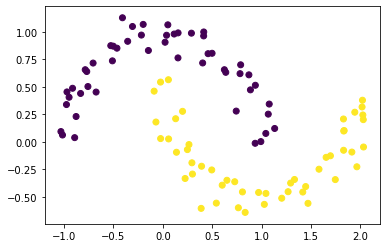

In [3]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np


x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

# Задание 3
Выполните задание 2 с помощью sklearn